In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

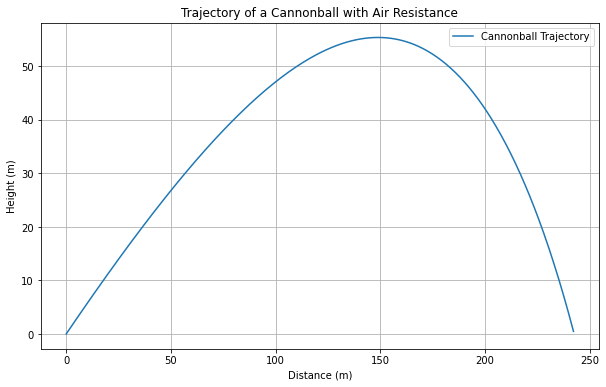

In [1]:

# Physical constants
m = 1.0  # mass in kg
R = 0.08  # radius in m
rho = 1.22  # air density in kg/m^3
C = 0.47  # drag coefficient
g = 9.81  # gravitational acceleration in m/s^2
v0 = 100.0  # initial velocity in m/s
theta = np.radians(30)  # launch angle in radians

# Drag constant
k = 0.5 * C * rho * np.pi * R**2 / m

# Initial conditions
v_x0 = v0 * np.cos(theta)
v_y0 = v0 * np.sin(theta)
x0, y0 = 0.0, 0.0  # initial position

# Function defining the system of ODEs
def cannonball(t, state):
    x, y, v_x, v_y = state
    speed = np.sqrt(v_x**2 + v_y**2)
    dxdt = v_x
    dydt = v_y
    dvxdt = -k * v_x * speed
    dvydt = -g - k * v_y * speed
    return [dxdt, dydt, dvxdt, dvydt]

# Time span and initial state
t_span = (0, 20)  # 20 seconds should suffice for trajectory
initial_state = [x0, y0, v_x0, v_y0]

# Solve the system of ODEs
solution = solve_ivp(cannonball, t_span, initial_state, t_eval=np.linspace(0, 20, 1000))

# Extract results
x, y = solution.y[0], solution.y[1]

# Filter for when the cannonball hits the ground (y >= 0)
valid_indices = y >= 0
x = x[valid_indices]
y = y[valid_indices]

# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Cannonball Trajectory")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.title("Trajectory of a Cannonball with Air Resistance")
plt.grid()
plt.legend()
plt.show()


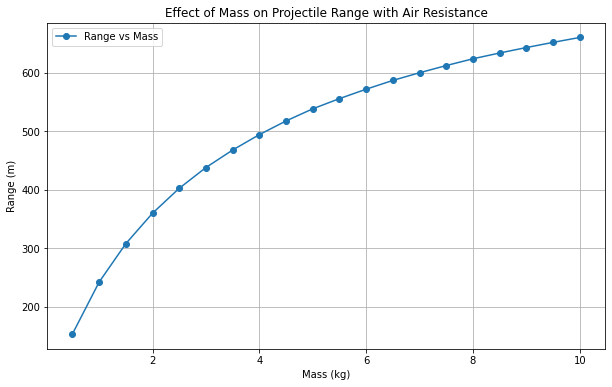

In [4]:
# Drag constant function (dependent on mass)
def drag_constant(mass):
    return 0.5 * C * rho * np.pi * R**2 / mass

# Function defining the system of ODEs
def cannonball_with_air_resistance(t, state, k):
    x, y, v_x, v_y = state
    speed = np.sqrt(v_x**2 + v_y**2)
    dxdt = v_x
    dydt = v_y
    dvxdt = -k * v_x * speed
    dvydt = -g - k * v_y * speed
    return [dxdt, dydt, dvxdt, dvydt]

# Time span and initial conditions
t_span = (0, 20)  # 20 seconds
t_eval = np.linspace(0, 20, 1000)

# Varying masses and computing ranges
masses = np.linspace(0.5, 10.0, 20)  # masses from 0.5 kg to 10 kg
ranges = []

for mass in masses:
    k = drag_constant(mass)
    v_x0 = v0 * np.cos(theta)
    v_y0 = v0 * np.sin(theta)
    initial_state = [0, 0, v_x0, v_y0]
    solution = solve_ivp(cannonball_with_air_resistance, t_span, initial_state, t_eval=t_eval, args=(k,))
    x, y = solution.y[0], solution.y[1]
    valid_indices = y >= 0
    ranges.append(x[valid_indices][-1])  # Distance when projectile hits the ground

# Plot the graph of range vs. mass
plt.figure(figsize=(10, 6))
plt.plot(masses, ranges, marker='o', linestyle='-', label="Range vs Mass")
plt.xlabel("Mass (kg)")
plt.ylabel("Range (m)")
plt.title("Effect of Mass on Projectile Range with Air Resistance")
plt.grid()
plt.legend()
plt.show()
